<a href="https://colab.research.google.com/github/VasilisaBolivar/MagicBall/blob/main/ai_academy_predictive_maintenance_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Part 1: Computing Simple Statistics
Now let's manipulate a few numbers using the Wine Dataset. The cells below will load the dataset from https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-**2009**

In [28]:
path = "/content/winequality-red.csv"
file = open(path, 'r')

# This data is delimited by semicolons.
dataset = []
header = file.readline().strip().split(',')
print(header)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [29]:
lines = []

for line in file:
    fields = line.strip('\n').split(',')
    lines.append(fields)

In [30]:
# What's the data in the first line?
lines[0]

['7.4',
 '0.7',
 '0.0',
 '1.9',
 '0.076',
 '11.0',
 '34.0',
 '0.9978',
 '3.51',
 '0.56',
 '9.4',
 '5']

Let's convert the `lines` list into a dictionary with key/value pairs.  
**Note that for the sake of brevity, we're only interested in these features: `residual sugar`, `density`, `pH`, `alcohol`, and `quality`.**

In [31]:
dataset = []

for line in lines:
    d = dict(zip(header, line))
    # Don't forget to cast the correct data type for each field!
    d['residual sugar'] = float(d['residual sugar'])
    d['density'] = float(d['density'])
    d['pH'] = float(d['pH'])
    d['alcohol'] = float(d['alcohol'])
    # Instructor's Note: this is important; probably a good 'gotcha' question to have
    d['quality'] = int(d['quality'])
    dataset.append(d)

In [32]:
residular_sugar = []

for line in lines:
    rs = dict(zip(header, line))
    # Don't forget to cast the correct data type for each field!
    rs['residual sugar'] = float(rs['residual sugar'])
    rs['quality'] = int(rs['quality'])
    residular_sugar.append(rs)

In [34]:
print(residular_sugar)

[{'fixed acidity': '7.4', 'volatile acidity': '0.7', 'citric acid': '0.0', 'residual sugar': 1.9, 'chlorides': '0.076', 'free sulfur dioxide': '11.0', 'total sulfur dioxide': '34.0', 'density': '0.9978', 'pH': '3.51', 'sulphates': '0.56', 'alcohol': '9.4', 'quality': 5}, {'fixed acidity': '7.8', 'volatile acidity': '0.88', 'citric acid': '0.0', 'residual sugar': 2.6, 'chlorides': '0.098', 'free sulfur dioxide': '25.0', 'total sulfur dioxide': '67.0', 'density': '0.9968', 'pH': '3.2', 'sulphates': '0.68', 'alcohol': '9.8', 'quality': 5}, {'fixed acidity': '7.8', 'volatile acidity': '0.76', 'citric acid': '0.04', 'residual sugar': 2.3, 'chlorides': '0.092', 'free sulfur dioxide': '15.0', 'total sulfur dioxide': '54.0', 'density': '0.997', 'pH': '3.26', 'sulphates': '0.65', 'alcohol': '9.8', 'quality': 5}, {'fixed acidity': '11.2', 'volatile acidity': '0.28', 'citric acid': '0.56', 'residual sugar': 1.9, 'chlorides': '0.075', 'free sulfur dioxide': '17.0', 'total sulfur dioxide': '60.0', 

Now that we have our `dataset`, let's try calculating some simple statistics. We will investigate the number of wines, the average `quality` of the wine, and more.

In [35]:
# Get the number of wines in the dataset
# Make sure there are 1599 entries in the dataset!
numWines = len(dataset)
numWines

1599

In [36]:
numRS = len(residular_sugar)
numRS

1599

In [6]:
# Get the average quality of all wines in the dataset
average = 0
for d in dataset:
    average += d['quality'] # the quality score for that wine
average /= numWines    # the total number of wines
average

5.6360225140712945

In [25]:
averageS = 0
for rs in residular_sugar:
    averageS += rs['quality'] # the quality score for that wine
averageS /= numRS    # the total number of wines
averageS

5.6360225140712945

In [7]:
# Get the number of unique levels of alcohol less than 10% alcohol (e.g. 9.5, 9.4, 8.0, etc.)
numLowAlc = set()
for d in dataset:
    if d['alcohol'] < 10:
        numLowAlc.add(d['alcohol'])

len(numLowAlc)

20

In [41]:
numLowAlcS = set()
for rs in residular_sugar:
    if rs < 10:
        numLowAlcS.add(rs['alcohol'])

len(numLowAlcS)

TypeError: ignored

In [38]:
# Compare the average quality of wines with less than 10% alcohol vs that of wines with greater than 10% alcohol.
avLowAlc = 0
avHighAlc = 0
nLowAlc = 0
nHighAlc = 0
for d in dataset:
    if d['alcohol'] < 10:          # Is this wine low in alcohol?
        avLowAlc += d['quality']   # Get the quality score for the wine
        nLowAlc += 1               # Increment the number of low-alcohol wines
    else:
        avHighAlc += d['quality']
        nHighAlc += 1

avLowAlc /= nLowAlc                # Calculate the average quality for each type of wine
avHighAlc /= nHighAlc
avLowAlc, avHighAlc                # Do you prefer low or high alcohol-content wines? No right answer...

(5.266176470588236, 5.90968443960827)

Text(0.5, 1.0, 'Histogram of alcohol content in wine')

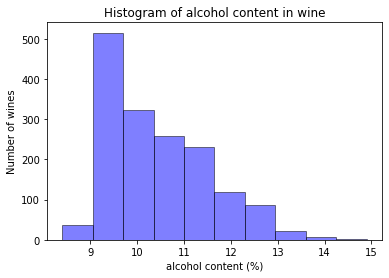

In [9]:
import numpy as np
alcohols = np.zeros([len(dataset),1])
for n, d in enumerate(dataset):
    alcohols[n]=d['alcohol']

import matplotlib.pyplot as plt


bin_edges = [0,15,30,45,60]

plt.hist(alcohols,
         #bins=bin_edges,
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5)

plt.xlabel('alcohol content (%)')
#plt.xticks([0,15,30,45,60])
plt.ylabel('Number of wines')
plt.title('Histogram of alcohol content in wine')


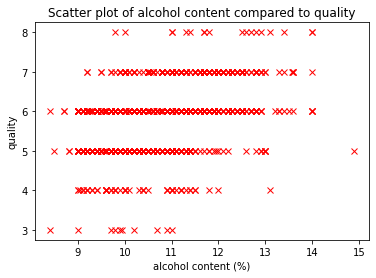

In [10]:
import numpy as np
quality = np.zeros([len(dataset)])
alcohol = np.zeros([len(dataset)])
for n, d in enumerate(dataset):
    quality[n]=d['quality']
    alcohol[n]=d['alcohol']

plt.plot(alcohol,quality,'rx')
plt.xlabel('alcohol content (%)')
#plt.xticks([0,15,30,45,60])
plt.ylabel('quality')
plt.title('Scatter plot of alcohol content compared to quality')
plt.show()

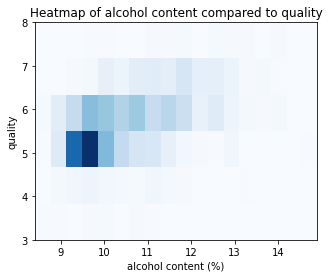

In [11]:
from matplotlib.pyplot import cm

heatmap, xedges, yedges = np.histogram2d(alcohol, quality, bins=[18, 6])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.Blues)
plt.xlabel('alcohol content (%)')
plt.ylabel('quality')
plt.title('Heatmap of alcohol content compared to quality')
plt.show()